<a href="https://colab.research.google.com/github/gkh2004/Mini-project-8/blob/main/miniproject_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
set.seed(123)  # for reproducibility

# Generate 1000 random strings, each of 10 characters
random_strings <- replicate(1000, paste0(sample(c(letters, LETTERS), 10, replace = TRUE), collapse = ""))

# Write to a text file
writeLines(random_strings, "random_strings.txt")

# Confirm creation
cat("File 'random_strings.txt' created with 1000 random strings.\n")


File 'random_strings.txt' created with 1000 random strings.


In [6]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




Number of rows with at least one NA: 100 
Columns with correlation <= 0.7: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,1,0,0,⋯,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0


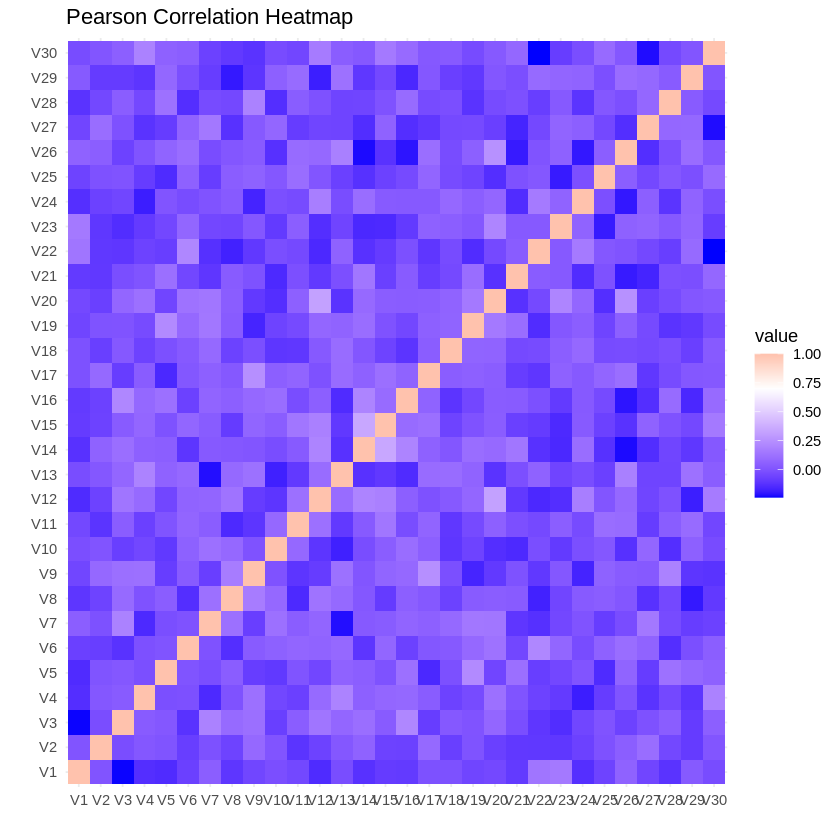

In [7]:

# Load required libraries
library(ggplot2)
library(reshape2)

# Set seed for reproducibility
set.seed(123)

# Create dataset: 100 rows, 30 columns with values between 1 and 200
df <- as.data.frame(matrix(sample(1:200, 100 * 30, replace = TRUE), nrow = 100, ncol = 30))

# ------------------ (i) Replace values between [10,60] with NA ------------------
df[df >= 10 & df <= 60] <- NA

# Count number of rows having at least one missing value
rows_with_na <- sum(apply(df, 1, function(row) any(is.na(row))))
cat("Number of rows with at least one NA:", rows_with_na, "\n")

# ------------------ (ii) Replace NA with column mean ------------------
for (i in 1:ncol(df)) {
  df[is.na(df[, i]), i] <- mean(df[, i], na.rm = TRUE)
}

# ------------------ (iii) Pearson correlation and heatmap ------------------
cor_matrix <- cor(df, method = "pearson")

# Plotting heatmap
melted_cor <- melt(cor_matrix)
ggplot(data = melted_cor, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0.7) +
  theme_minimal() +
  labs(title = "Pearson Correlation Heatmap", x = "", y = "")

# Select columns where correlation <= 0.7 with at least one other column
low_corr_cols <- which(apply(cor_matrix, 2, function(x) any(x <= 0.7 & x != 1)))
cat("Columns with correlation <= 0.7:", low_corr_cols, "\n")

# ------------------ (iv) Normalize all values between 0 and 10 ------------------
normalize <- function(x) {
  return(10 * (x - min(x)) / (max(x) - min(x)))
}
normalized_df <- as.data.frame(lapply(df, normalize))

# ------------------ (v) Replace values: <=0.5 with 1, else 0 ------------------
binary_df <- as.data.frame(lapply(normalized_df, function(x) ifelse(x <= 0.5, 1, 0)))

# Print first few rows of final binary dataset (optional)
head(binary_df)


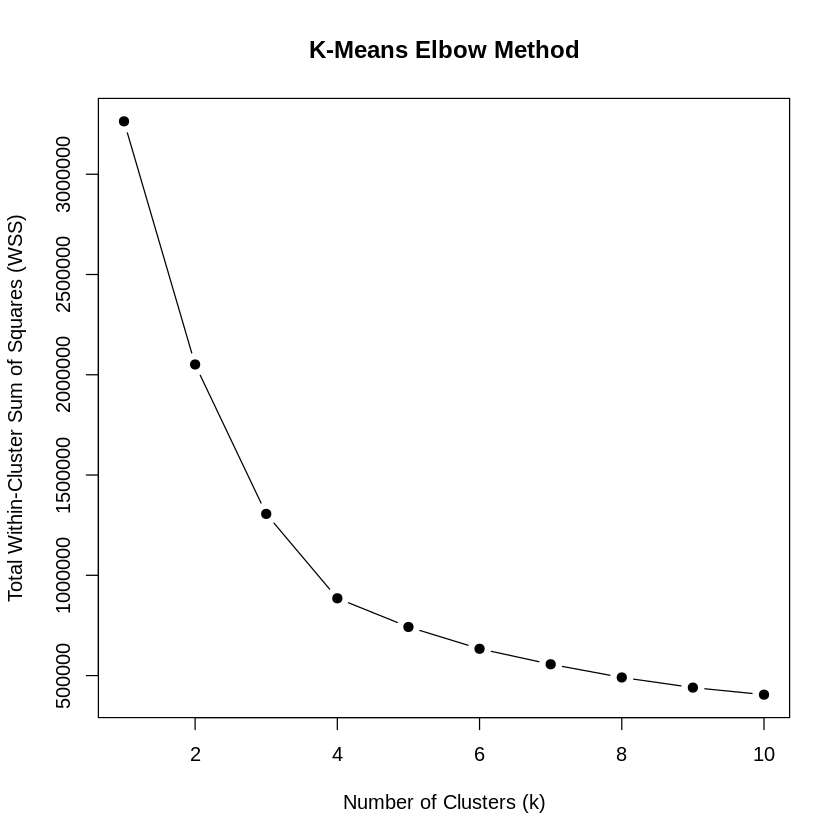

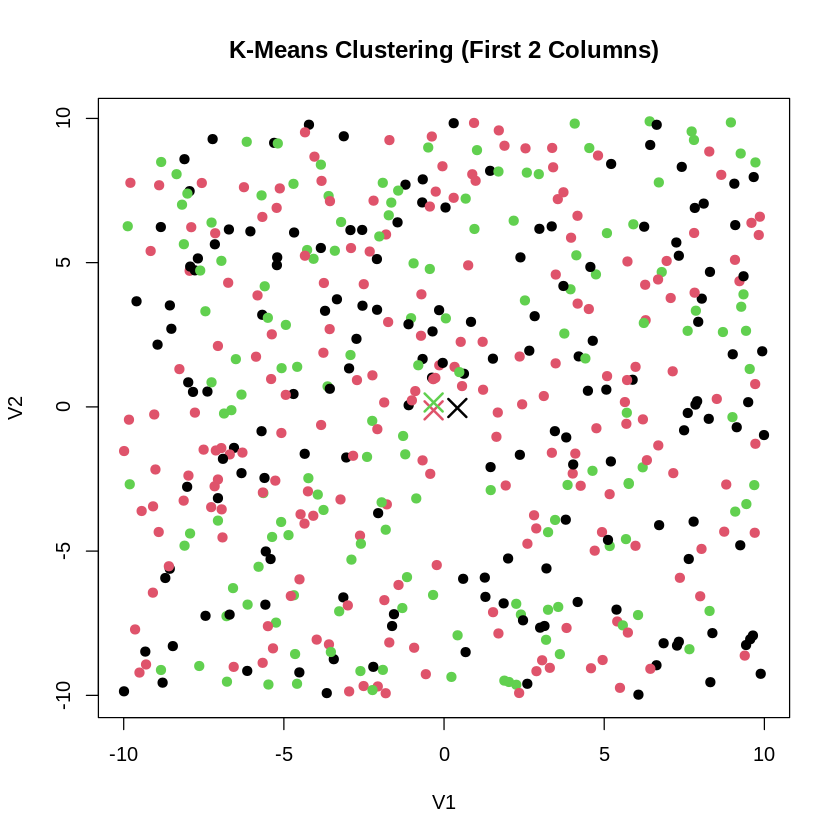

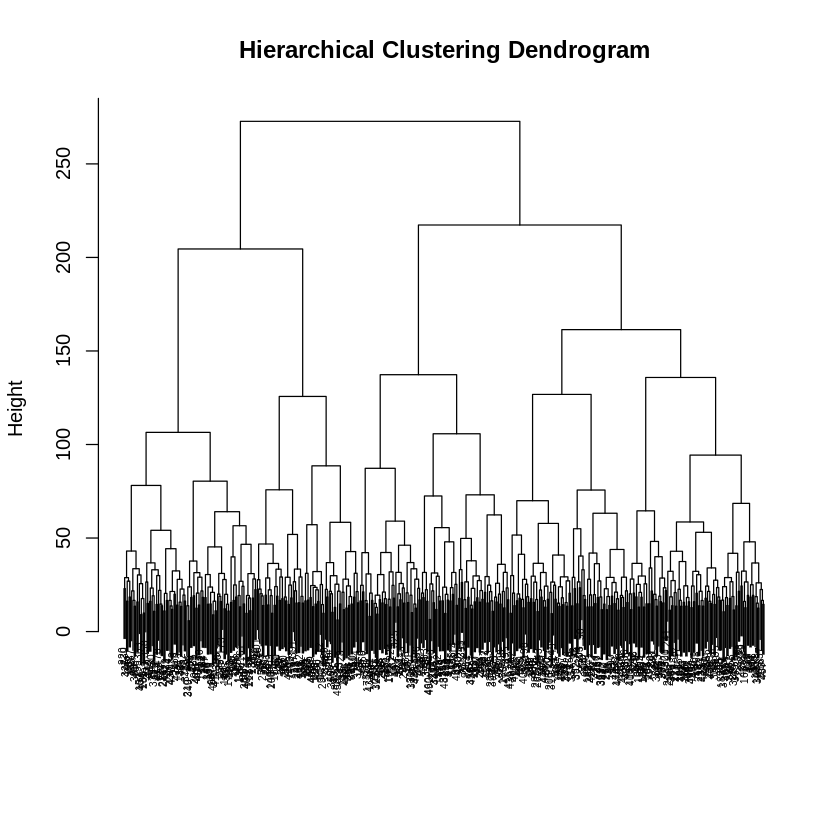

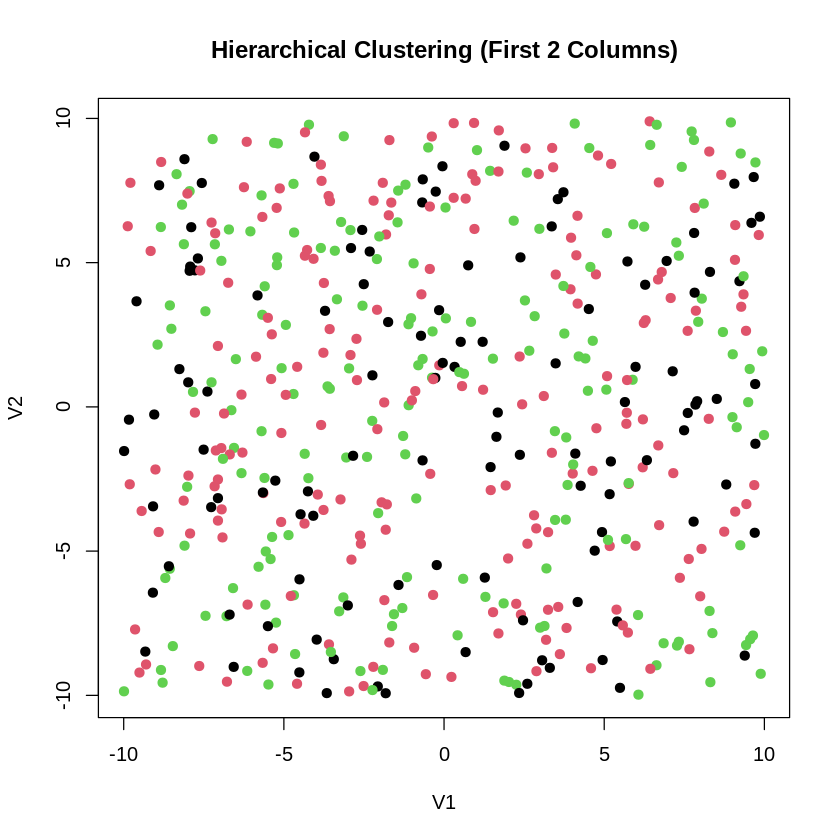

In [13]:
# ------------------ Generate Dataset ------------------
set.seed(123)

df <- data.frame(
  matrix(runif(500 * 4, min = -10, max = 10), ncol = 4),      # Columns 1–4
  matrix(runif(500 * 4, min = 10, max = 20), ncol = 4),       # Columns 5–8
  matrix(runif(500 * 2, min = -100, max = 100), ncol = 2)     # Columns 9–10
)
colnames(df) <- paste0("V", 1:10)

# ------------------ K-Means: Elbow Method ------------------
wss <- numeric(10)
for (k in 1:10) {
  set.seed(123)
  km_res <- kmeans(df, centers = k, nstart = 10)
  wss[k] <- km_res$tot.withinss
}

# Plot Elbow graph
plot(1:10, wss, type = "b", pch = 19,
     xlab = "Number of Clusters (k)",
     ylab = "Total Within-Cluster Sum of Squares (WSS)",
     main = "K-Means Elbow Method")

# ------------------ K-Means Clustering (k = 3) ------------------
set.seed(123)
kmeans_result <- kmeans(df, centers = 3, nstart = 10)

# Plot K-Means clusters using first 2 dimensions
plot(df[, 1:2], col = kmeans_result$cluster, pch = 19,
     main = "K-Means Clustering (First 2 Columns)")
points(kmeans_result$centers[, 1:2], col = 1:3, pch = 4, cex = 2, lwd = 2)

# ------------------ Hierarchical Clustering ------------------
# Compute distance matrix
dist_matrix <- dist(df)

# Perform hierarchical clustering
hc <- hclust(dist_matrix, method = "complete")

# Plot dendrogram
plot(hc, main = "Hierarchical Clustering Dendrogram", xlab = "", sub = "", cex = 0.5)

# Cut tree to form 3 clusters
hc_clusters <- cutree(hc, k = 3)

# Plot Hierarchical Clusters using first 2 dimensions
plot(df[, 1:2], col = hc_clusters, pch = 19,
     main = "Hierarchical Clustering (First 2 Columns)")


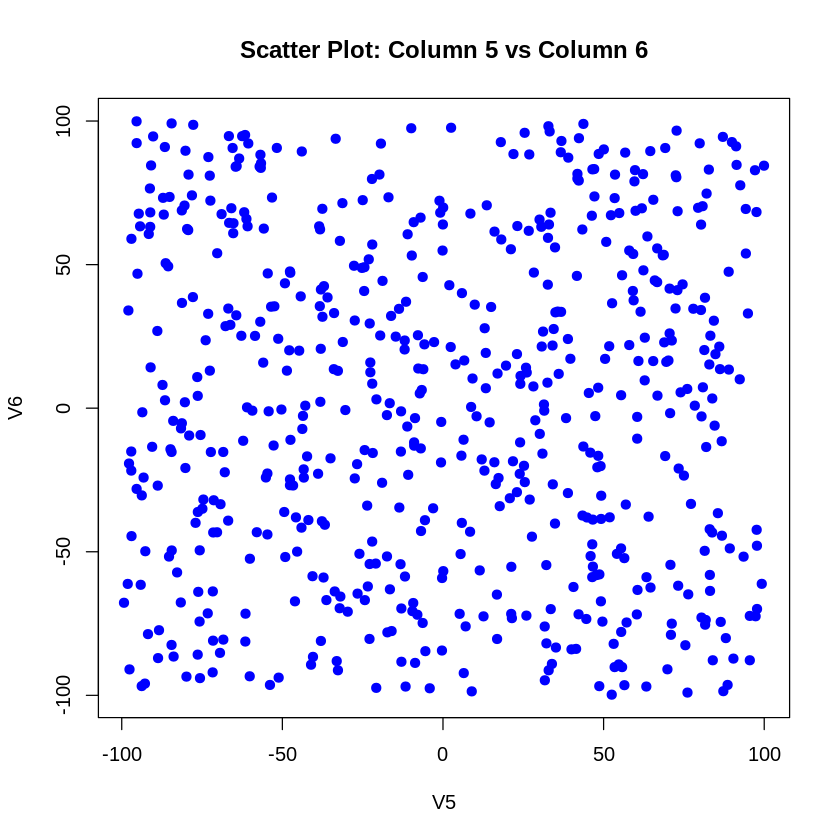

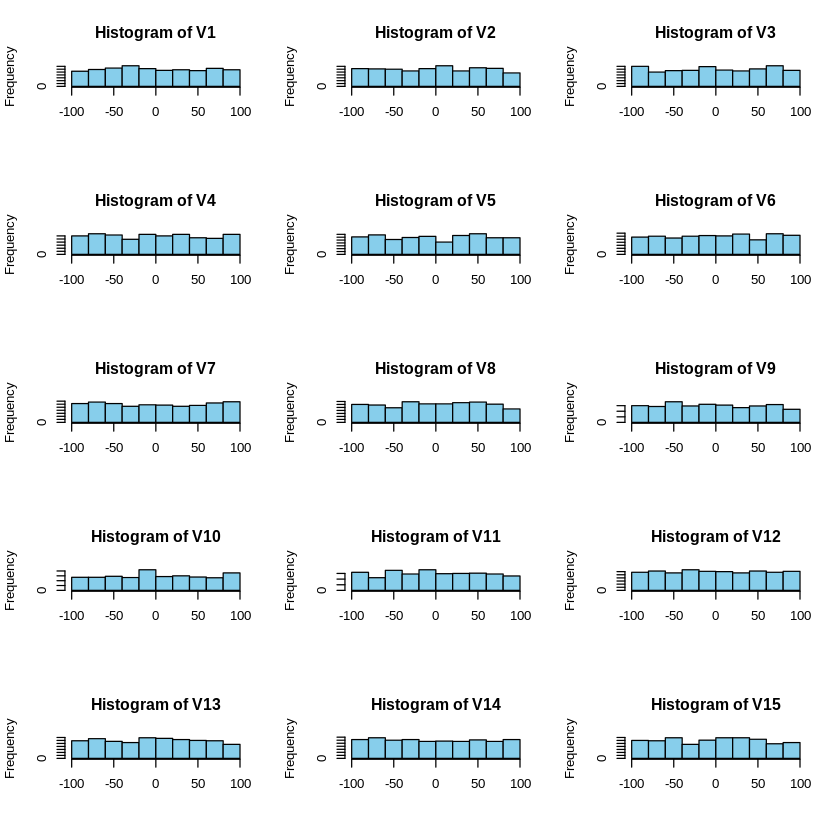

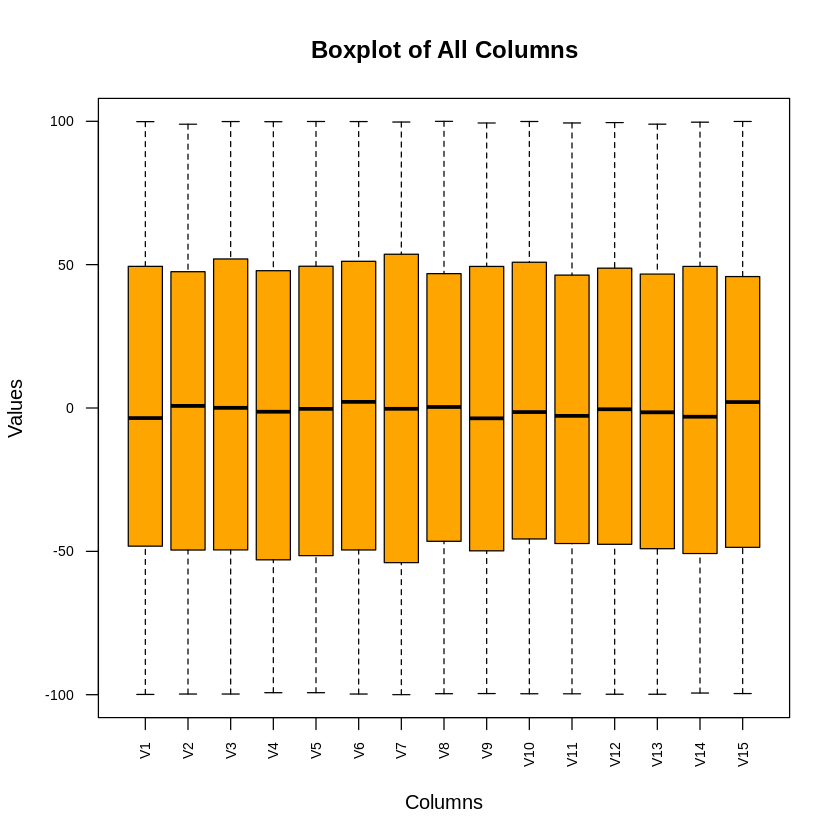

In [14]:
# ------------------ Generate Dataset ------------------
set.seed(123)
df <- data.frame(matrix(runif(600 * 15, min = -100, max = 100), nrow = 600))
colnames(df) <- paste0("V", 1:15)

# ------------------ (i) Scatter Plot: Column 5 vs Column 6 ------------------
plot(df$V5, df$V6,
     main = "Scatter Plot: Column 5 vs Column 6",
     xlab = "V5", ylab = "V6",
     pch = 19, col = "blue")

# ------------------ (ii) Histograms of All Columns ------------------
par(mfrow = c(5, 3))  # layout: 5 rows, 3 columns = 15 plots
for (i in 1:15) {
  hist(df[[i]],
       main = paste("Histogram of", colnames(df)[i]),
       xlab = "", col = "skyblue", border = "black")
}
par(mfrow = c(1,1))  # reset layout

# ------------------ (iii) Boxplot of All Columns ------------------
boxplot(df,
        main = "Boxplot of All Columns",
        col = "orange", las = 2,
        xlab = "Columns", ylab = "Values",
        cex.axis = 0.7)



In [15]:
# ------------------ Generate Dataset ------------------
set.seed(123)
df <- data.frame(matrix(runif(500 * 5, min = 5, max = 10), nrow = 500))
colnames(df) <- paste0("V", 1:5)

# ------------------ (i) One-sample t-Test on each column ------------------
cat("One-Sample t-Test (H0: mean = 7.5):\n")
for (i in 1:5) {
  cat("\nColumn", i, "\n")
  print(t.test(df[[i]], mu = 7.5))
}

# ------------------ (ii) Wilcoxon Signed Rank Test on each column ------------------
cat("\nWilcoxon Signed Rank Test (H0: median = 7.5):\n")
for (i in 1:5) {
  cat("\nColumn", i, "\n")
  print(wilcox.test(df[[i]], mu = 7.5))
}

# ------------------ (iii) Two Sample t-Test and Wilcoxon Rank Sum Test ------------------
cat("\nTwo-Sample t-Test between Column 3 and Column 4:\n")
print(t.test(df$V3, df$V4))

cat("\nWilcoxon Rank Sum Test between Column 3 and Column 4:\n")
print(wilcox.test(df$V3, df$V4))


One-Sample t-Test (H0: mean = 7.5):

Column 1 

	One Sample t-test

data:  df[[i]]
t = -0.37079, df = 499, p-value = 0.711
alternative hypothesis: true mean is not equal to 7.5
95 percent confidence interval:
 7.351464 7.601373
sample estimates:
mean of x 
 7.476418 


Column 2 

	One Sample t-test

data:  df[[i]]
t = -0.055988, df = 499, p-value = 0.9554
alternative hypothesis: true mean is not equal to 7.5
95 percent confidence interval:
 7.368610 7.624109
sample estimates:
mean of x 
  7.49636 


Column 3 

	One Sample t-test

data:  df[[i]]
t = -0.4821, df = 499, p-value = 0.6299
alternative hypothesis: true mean is not equal to 7.5
95 percent confidence interval:
 7.345020 7.593909
sample estimates:
mean of x 
 7.469464 


Column 4 

	One Sample t-test

data:  df[[i]]
t = 0.20319, df = 499, p-value = 0.8391
alternative hypothesis: true mean is not equal to 7.5
95 percent confidence interval:
 7.386422 7.639779
sample estimates:
mean of x 
 7.513101 


Column 5 

	One Sample t-test